In [77]:
# Torch Dependencies
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from torch.autograd import Variable

# Importing Other Dependencies
import csv
import random
from PIL import Image
import math
import time
from tqdm import tqdm
import pickle
import datetime

In [78]:
# Function for showing image from vector form (4725 long numpy vector)
def show_img_vec(img_vec):
    img_vec_shaped = img_vec.reshape(45,35,3)
    plt.imshow(img_vec_shaped)

In [79]:
# Importing pickle - reduces time to import from .jpg from >3 hours to ~3 seconds.
    # The pickle is of type numpy array (202600 x 4725)
X_array = pickle.load( open( "X_array.p", "rb" ) )

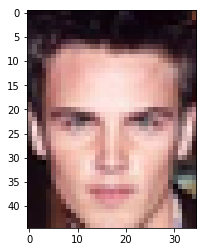

In [80]:
# show_img_vec(X_array[200000])
X_array.shape

test_torch_tensor = torch.from_numpy(X_array[200000])
show_img_vec(test_torch_tensor.numpy())

In [81]:
# Creating Model!
# This will be a relatively un-advanced densely connected model that will reduce the size by
    # factor of ~17 (to a 300-dimensional vector) and attempts to reconstruct it. 

class Autoencoder_One(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Autoencoder_One, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, input_size)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        return out
    
    def compress(self, x):
        out = self.fc1(x)
        return out

tensor([[252, 239, 207,  ..., 243, 170, 132],
        [252, 239, 207,  ..., 243, 170, 132],
        [ 38,  27,  26,  ...,  56,  36,  28],
        ...,
        [254, 245, 228,  ...,   4,   5,   7],
        [  1,   1,   1,  ..., 175, 153, 103],
        [123, 123, 125,  ..., 187, 105,  39]], dtype=torch.int32)


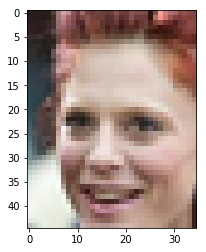

In [93]:
learning_rate = 0.001
num_epochs =  500

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

# Setting up data as tensor and Variable
Tensor_X = torch.from_numpy(X_array[0:1000]).int()
print(Tensor_X)
Variable_X = Variable(Tensor_X)

# Setting up loss function
loss_fn = nn.MSELoss()

# Initializing model
model_1 = Autoencoder_One(4725, 400)

# Setting up optimizer
optimizer = torch.optim.SGD(model_1.parameters(), lr=learning_rate, nesterov=True, momentum = 0.9, dampening = 0)

# Testing Tensor_X
show_img_vec( (Variable_X.data).numpy()[2] )

In [83]:
print("H")
for epoch in range(num_epochs):
    model_1.train()
    optimizer.zero_grad()
    Pred_X = model_1(Variable_X)
    loss = loss_fn(Pred_X, Variable_X)
    loss.backward()
    optimizer.step()

    model_1.eval()
    train_loss.append(float(loss.data))


#     test_results = test_model(simple_rick, testor_y, testor_X, tensor_y, tensor_X)

#     train_accuracy.append(test_results[1])
#     test_accuracy.append(test_results[0])

    if epoch % 100 == 0:
        print("=========="+str(epoch)+"==========")
        print("Loss: ",float(loss))
        print(datetime.datetime.now())
#         print("Test Accuracy: ",test_results[0])
#         print("Train Accuracy: ",test_results[1])
#         out_vec = model_1(Tensor_X[0])
#         out_vec = out_vec.detach().numpy()
#         show_img_vec(out_vec)

H
==========0==========
Loss:  18676.244140625
2019-02-10 22:26:33.107209
==========100==========
Loss:  17785.822265625
2019-02-10 22:26:43.696141
==========200==========
Loss:  17773.638671875
2019-02-10 22:26:54.820161
==========300==========
Loss:  17761.462890625
2019-02-10 22:27:06.177164
==========400==========
Loss:  17749.30078125
2019-02-10 22:27:17.722178


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([0.4105, 0.3488, 0.2826,  ..., 0.2760, 0.1402, 0.2505])
tensor([ 52.,  26.,  13.,  ..., 168., 193., 190.])
tensor(3447.1177)


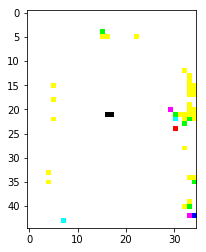

In [85]:
face_num = 300

out_vec = model_1(Tensor_X[face_num])
out_vec = out_vec.data
print(out_vec)
print(Tensor_X[face_num])


out_vec = (out_vec.numpy())

out_vec *= 0.3

out_vec.shape

print(loss_fn(torch.from_numpy(out_vec), Tensor_X[face_num]))

show_img_vec((Tensor_X[face_num]).numpy())


# test_torch_tensor = torch.from_numpy(X_array[200000])
# show_img_vec(test_torch_tensor.numpy())